In [2]:
#Primero importamos algunas librerias
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geemap,ee
import matplotlib.colors as colors
from shapely.geometry import shape, box
from matplotlib import colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os

Link de los datos: https://datos.gob.cl/dataset/establecimientos-de-salud-vigentes

In [3]:
#Abrimos el archivo
gdf = gpd.read_file(os.path.join('Datos', 'establecimientos_20250527.csv'), encoding='utf-8')

In [4]:
gdf.head()

,EstablecimientoCodigo,EstablecimientoGlosa,EstablecimientoCodigoAntiguo,EstablecimientoCodigoMadreAntiguo,EstablecimientoCodigoMadreNuevo,RegionCodigo,RegionGlosa,SeremiSaludCodigo_ServicioDeSaludCodigo,SeremiSaludGlosa_ServicioDeSaludGlosa,TipoPertenenciaEstabGlosa,...,TieneServicioUrgencia,TipoUrgencia,ClasificacionTipoSapu,Latitud,Longitud,TipoSistemaSaludGlosa,EstadoFuncionamiento,NivelComplejidadEstabGlosa,TipoAtencionEstabGlosa,FechaIncorporacion
0,126704,Hospital Comunitario Cristina Calderón de Puer...,26-704,,,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios...,...,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.935209,-67.600393,Público,Vigente en Operación Habitual,Baja Complejidad,Atención Cerrada-Hospitalaria,
1,126204,Hospital Naval (Puerto Williams),26-204,,,12,Región De Magallanes y de la Antártica Chilena,12,SEREMI De Magallanes y la Antártica Chilena,No Perteneciente al Sistema Nacional de Servic...,...,SI,Urgencia Hospitalaria (UEH),No Aplica,-54.934374,-67.608895,Fuerzas Armadas y de Orden (FFAA),Vigente en Operación Habitual,Mediana Complejidad,Atención Cerrada-Hospitalaria,07-10-2022
2,126412,Posta de Salud Rural Cameron,26-412,,,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios...,...,NO,No Aplica,No Aplica,-53.640546,-69.645848,Público,Vigente en Operación Habitual,Baja Complejidad,Atención Abierta-Ambulatoria,
3,126414,Posta de Salud Rural Agua Fresca,26-414,,,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios...,...,NO,No Aplica,No Aplica,-53.404244,-70.990158,Público,Vigente en Operación Habitual,Baja Complejidad,Atención Abierta-Ambulatoria,
4,126102,Hospital Dr. Marco Antonio Chamorro ( Porvenir),26-102,,,12,Región De Magallanes y de la Antártica Chilena,26,Servicio de Salud Magallanes,Perteneciente al Sistema Nacional de Servicios...,...,SI,Urgencia Hospitalaria (UEH),No Aplica,-53.298162,-70.358384,Público,Vigente en Operación Habitual,Baja Complejidad,Atención Cerrada-Hospitalaria,


In [5]:
len(gdf)

4893

In [6]:
import pandas as pd

#Veamos los datos 
len(gdf[pd.to_numeric(gdf["Latitud"], errors='coerce').notnull()])

4705

In [7]:
#Pasamos las columnas de latitud y longitud a tipo float usando pd.to_numeric para evitar errores
gdf['Latitud'] = pd.to_numeric(gdf['Latitud'], errors='coerce')
gdf['Longitud'] = pd.to_numeric(gdf['Longitud'], errors='coerce')

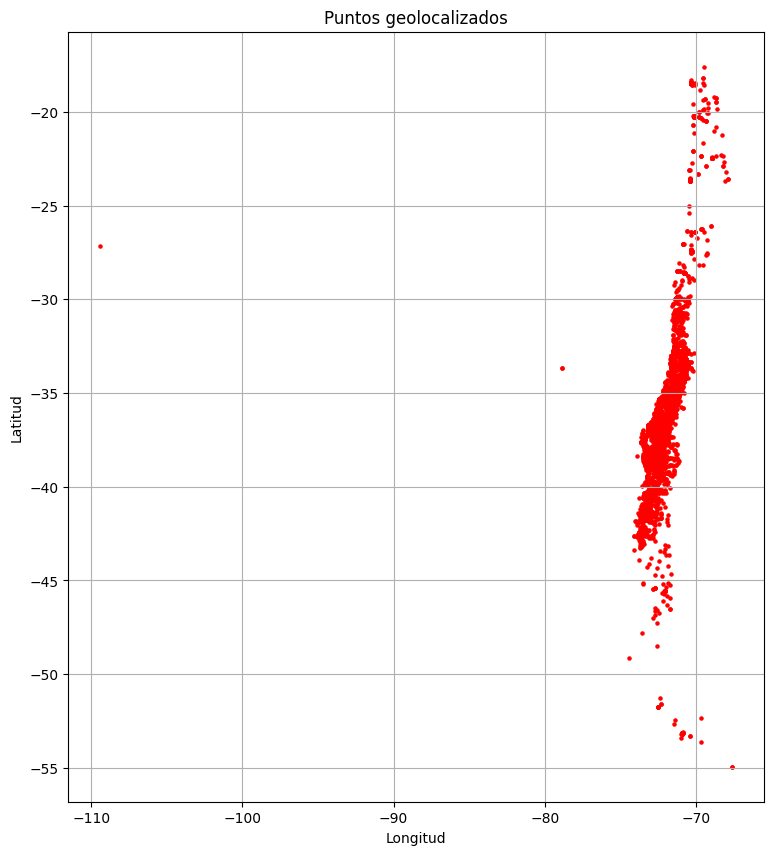

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Crear geometrías a partir de latitud y longitud
gdf['geometry'] = gdf.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)

# Convertir a GeoDataFrame
geo = gpd.GeoDataFrame(gdf, geometry='geometry', crs="EPSG:4326")

# Plotear
geo.plot(marker='o', color='red', markersize=5, figsize=(10, 10))
plt.title("Puntos geolocalizados")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


# Parte contaminacion luminica

In [9]:
ee.Authenticate()
ee.Initialize(project='ee-ccamz2')


In [21]:
#Elegimos una fecha
fecha = '2012-01-01'
end = '2012-1-31'


In [22]:
collection = (ee.ImageCollection("NOAA/DMSP-OLS/NIGHTTIME_LIGHTS").filterDate(fecha, end))

In [23]:
#Mostramos la coleccion
print(collection.getInfo())

{'type': 'ImageCollection', 'bands': [], 'version': 1641990587059951, 'id': 'NOAA/DMSP-OLS/NIGHTTIME_LIGHTS', 'properties': {'system:visualization_0_min': '3.0', 'type_name': 'ImageCollection', 'keywords': ['dmsp', 'eog', 'imagery', 'lights', 'nighttime', 'ols', 'visible', 'yearly'], 'thumb': 'https://mw1.google.com/ges/dd/images/NIGHTTIME_thumb.png', 'description': '<p>The Defense Meteorological Program (DMSP) Operational Line-Scan System\n(OLS) has a unique capability to detect visible and near-infrared (VNIR)\nemission sources at night.</p><p>Version 4 of the DMSP-OLS Nighttime Lights Time Series consists of\ncloud-free composites made using all the available archived DMSP-OLS smooth\nresolution data for calendar years. In cases where two satellites were\ncollecting data, two composites were produced.</p><p><b>Provider: <a href="https://eogdata.mines.edu/dmsp/downloadV4composites.html">Earth Observation Group, Payne Institute for Public Policy, Colorado School of Mines</a></b><br><p

In [24]:
# Selecciona la imagen promedio del año
image = collection.mean()

# Selecciona la banda de intensidad de luces nocturnas
image_vis = image.select('stable_lights')

# Define parámetros de visualización
vis_params = {
    'min': 0,
    'max': 63,
    'palette': ['000000', 'ffff00', 'ffffff']
}

# Crea un mapa interactivo
Map = geemap.Map(center=[20, 0], zoom=2)
Map.addLayer(image_vis, vis_params, 'Luces nocturnas (promedio)')
Map.addLayerControl()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(child…